# Unsupervised Music Genre Classification

In [1]:
#conda install -c conda-forge librosa

In [2]:
import pandas as pd
import librosa
import sklearn
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Import Data

## Read CSV

In [3]:
_3sec = pd.read_csv('gh_proj/music_genre_classification/Data/features_3_sec.csv')
_30sec = pd.read_csv('gh_proj/music_genre_classification/Data/features_30_sec.csv')

Inspect data:

In [4]:
_3sec.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [5]:
_30sec.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


View the types of columns in our data.
There should be the same amount of columns for both csv, hence we can only inspect types in the 3-sec DF:

In [6]:
_3sec.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

Briefly inspect the distribution of variables for both DF, excluding the local features (which are long to output):

In [7]:
_30sec.iloc[: , 2:19].describe()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,137079.155165,4571.549304,1.844345e+06,0.103612,0.002986,-3.659332e-04,0.012540,-0.000395,5.670073e-03,119.505363
std,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,96455.666326,1574.791602,1.425085e+06,0.041821,0.003024,1.683946e-03,0.011653,0.001082,6.500325e-03,28.264176
min,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185064,749.140636,1.468612e+04,0.021697,0.000044,-2.606458e-02,0.000049,-0.007150,8.299008e-07,54.978391
25%,0.319562,0.082298,0.086657,0.000942,1627.697311,1.843505e+05,1907.240605,67376.554428,3380.069642,7.727312e+05,0.070244,0.001079,-1.041584e-04,0.004383,-0.000537,1.292592e-03,99.384014
50%,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,111977.548036,4658.524473,1.476115e+06,0.099503,0.002022,-3.176783e-06,0.008768,-0.000036,3.410864e-03,117.453835
75%,0.435942,0.091256,0.175682,0.003577,2691.294667,6.121479e+05,2578.469836,182371.576801,5533.810460,2.555262e+06,0.131944,0.003628,6.643430e-07,0.016947,-0.000004,7.641643e-03,135.999178
max,0.663685,0.108111,0.397973,0.027679,4435.243901,3.036843e+06,3509.646417,694784.811549,8677.672688,8.660900e+06,0.274631,0.028718,1.505448e-02,0.085658,0.005787,4.744598e-02,234.907670


In [8]:
_3sec.iloc[: , 2:19].describe()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo
count,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000
mean,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,1.628790e+06,0.102578,0.002620,-0.000365,1.259757e-02,-0.000396,5.601553e-03,124.887709
std,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,1.489398e+06,0.045651,0.003614,0.001699,1.263324e-02,0.001108,6.653225e-03,32.911676
min,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,1.145102e+03,0.013525,0.000005,-0.026672,9.312309e-23,-0.008794,4.672045e-08,24.377211
25%,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,5.595514e+05,0.067290,0.000628,-0.000127,4.086402e-03,-0.000579,1.106077e-03,103.359375
50%,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,1.160080e+06,0.097868,0.001390,-0.000013,8.429785e-03,-0.000056,3.347087e-03,123.046875
75%,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,2.262437e+06,0.132749,0.003058,0.000015,1.730287e-02,0.000020,7.520135e-03,143.554688
max,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,1.298320e+07,0.347705,0.065185,0.015688,1.270515e-01,0.006819,5.887909e-02,287.109375


Check for NAs:

In [9]:
_3sec.isnull().values.any()

False

In [10]:
_30sec.isnull().values.any()

False

There are no NAs in our DF.

We then check the labels balance:

In [11]:
_30sec['label'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

Explore the average parameters of each genre, excluding the local features (which are long to output, only used for training):

In [12]:
_30sec.groupby(['label']).mean().iloc[: , 1:18]

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo
label,,,,,,,,,,,,,,,,,
blues,0.341429,0.090700,0.136067,0.003015,1727.584661,289738.903099,1931.447105,113632.662376,3636.877154,1.505459e+06,0.078969,0.001634,-0.000458,0.013554,-5.644669e-04,0.004624,120.742207
classical,0.263542,0.085117,0.042920,0.000706,1353.878837,123433.708255,1521.709862,82450.128596,2482.325982,6.078867e+05,0.077611,0.000824,-0.000246,0.003074,-1.824151e-04,0.000209,127.920952
country,0.343812,0.086471,0.125988,0.001726,1896.210622,375603.751882,2099.535390,145431.565441,3949.577166,1.789992e+06,0.083400,0.001726,-0.000014,0.012879,-1.282015e-04,0.002920,110.858840
disco,0.415643,0.084668,0.136296,0.002895,2619.852229,498543.826654,2513.251591,133819.522275,5519.791820,1.816805e+06,0.129367,0.003568,-0.000252,0.009474,-1.436922e-04,0.007298,120.341798
hiphop,0.454319,0.088285,0.178344,0.007279,2524.518523,769122.746369,2513.452483,174018.893731,5333.623851,2.538228e+06,0.107977,0.005193,-0.000185,0.019727,-4.983469e-04,0.011880,112.945646
jazz,0.296643,0.089909,0.086648,0.001455,1792.360097,271372.514673,2021.001244,110450.414117,3750.174280,1.443197e+06,0.076971,0.001584,-0.000728,0.008014,-4.296731e-04,0.001033,115.068143
metal,0.479235,0.074208,0.153478,0.001308,2602.181204,216061.696329,2242.538687,68989.534738,5125.230255,7.641070e+05,0.147463,0.001939,-0.000575,0.013609,-9.896102e-04,0.005973,124.873912
pop,0.397632,0.089429,0.199734,0.007292,3073.549538,957036.816712,3008.195592,183446.721734,6654.772975,3.039896e+06,0.133561,0.006889,0.000014,0.023416,-5.452238e-07,0.014187,112.759957
reggae,0.408247,0.090597,0.122503,0.003132,2185.016755,772150.822191,2311.453709,222063.366304,4593.939352,3.121467e+06,0.091563,0.004057,-0.000759,0.010985,-6.668694e-04,0.004824,129.279738


In [13]:
_30sec.groupby(['label']).mean().iloc[: , 1:18]

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo
label,,,,,,,,,,,,,,,,,
blues,0.341429,0.090700,0.136067,0.003015,1727.584661,289738.903099,1931.447105,113632.662376,3636.877154,1.505459e+06,0.078969,0.001634,-0.000458,0.013554,-5.644669e-04,0.004624,120.742207
classical,0.263542,0.085117,0.042920,0.000706,1353.878837,123433.708255,1521.709862,82450.128596,2482.325982,6.078867e+05,0.077611,0.000824,-0.000246,0.003074,-1.824151e-04,0.000209,127.920952
country,0.343812,0.086471,0.125988,0.001726,1896.210622,375603.751882,2099.535390,145431.565441,3949.577166,1.789992e+06,0.083400,0.001726,-0.000014,0.012879,-1.282015e-04,0.002920,110.858840
disco,0.415643,0.084668,0.136296,0.002895,2619.852229,498543.826654,2513.251591,133819.522275,5519.791820,1.816805e+06,0.129367,0.003568,-0.000252,0.009474,-1.436922e-04,0.007298,120.341798
hiphop,0.454319,0.088285,0.178344,0.007279,2524.518523,769122.746369,2513.452483,174018.893731,5333.623851,2.538228e+06,0.107977,0.005193,-0.000185,0.019727,-4.983469e-04,0.011880,112.945646
jazz,0.296643,0.089909,0.086648,0.001455,1792.360097,271372.514673,2021.001244,110450.414117,3750.174280,1.443197e+06,0.076971,0.001584,-0.000728,0.008014,-4.296731e-04,0.001033,115.068143
metal,0.479235,0.074208,0.153478,0.001308,2602.181204,216061.696329,2242.538687,68989.534738,5125.230255,7.641070e+05,0.147463,0.001939,-0.000575,0.013609,-9.896102e-04,0.005973,124.873912
pop,0.397632,0.089429,0.199734,0.007292,3073.549538,957036.816712,3008.195592,183446.721734,6654.772975,3.039896e+06,0.133561,0.006889,0.000014,0.023416,-5.452238e-07,0.014187,112.759957
reggae,0.408247,0.090597,0.122503,0.003132,2185.016755,772150.822191,2311.453709,222063.366304,4593.939352,3.121467e+06,0.091563,0.004057,-0.000759,0.010985,-6.668694e-04,0.004824,129.279738


# Function for audio file parsing:

We also want to create function to parse an `mp3` audio file into the same csv format as the ones from the GTZAN data.

We will be using `l_30sec.iloc[: , 2:19].describe()ibrosa` package to parse, process and visualize our audio files.

In [14]:
def mp3_to_df(filename):
    y,sr = librosa.load(filename)
    length = len(y)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_stft_mean = chroma_stft.mean()
    chroma_stft_var = chroma_stft.var()
    rms = librosa.feature.rms(y=y)
    rms_mean = rms.mean()
    rms_var = rms.var()
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_centroid_mean = spectral_centroid.mean()
    spectral_centroid_var = spectral_centroid.var()
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    spectral_bandwidth_mean = spectral_bandwidth.mean()
    spectral_bandwidth_var = spectral_bandwidth.var()
    rolloff = librosa.feature.spectral_rolloff(y=y,sr=sr)
    rolloff_mean = rolloff.mean()
    rolloff_var = rolloff.var()
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=y)
    zero_crossing_rate_mean = zero_crossing_rate.mean()
    zero_crossing_rate_var = zero_crossing_rate.var()
    harmony = librosa.feature.tempogram(y=y, sr=sr)
    harmony_mean = harmony.mean()
    harmony_var = harmony.var()
    perceptr = librosa.effects.percussive(y=y)
    perceptr_mean = perceptr.mean()
    perceptr_var = perceptr.var()
    tempo = librosa.beat.tempo(y=y, sr=sr).mean()
    row = [[length,chroma_stft_mean,chroma_stft_var,
           rms_mean,rms_var,spectral_centroid_mean,
           spectral_centroid_var,spectral_bandwidth_mean,
           spectral_bandwidth_var,rolloff_mean,rolloff_var,
           zero_crossing_rate_mean,zero_crossing_rate_var,
           harmony_mean,harmony_var,perceptr_mean,
           perceptr_var,tempo]]
    df = pd.DataFrame(row, columns = 
                      ['length','chroma_stft_mean','chroma_stft_var',
                       'rms_mean','rms_var','spectral_centroid_mean',
                       'spectral_centroid_var','spectral_bandwidth_mean',
                       'spectral_bandwidth_var','rolloff_mean','rolloff_var',
                       'zero_crossing_rate_mean','zero_crossing_rate_var',
                       'harmony_mean','harmony_var','perceptr_mean',
                       'perceptr_var','tempo'])
    mfcc_arr = librosa.feature.mfcc(y=y, sr=sr)
    for i in range(len(mfcc_arr)):
        mean_colname = 'mfcc'+str(i+1)+'_mean'
        var_colname = 'mfcc'+str(i+1)+'_var'
        df[mean_colname] = mfcc_arr[i].mean()
        df[var_colname] = mfcc_arr[i].var()
    return df

In [15]:
_30train = _30sec.iloc[:,19:59:2]

In [16]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(_30train)
X_scale = scaler.transform(_30train)
_30scale = pd.DataFrame(X_scale, columns=_30train.columns)

In [17]:
np.shape(X_scale)

(1000, 20)

In [73]:
_30_original = sklearn.cluster.AgglomerativeClustering(n_clusters=None, distance_threshold=0, compute_distances=True).fit(X_scale)

In [71]:
_30_distances = _30_original.distances_

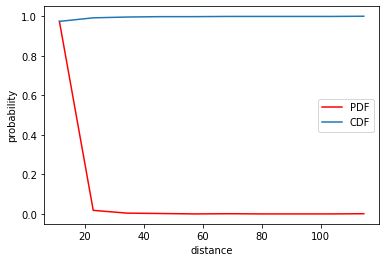

In [72]:
count, bins_count = np.histogram(_30_distances)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.xlabel('distance')
plt.ylabel('probability')
plt.legend()

Hence, we know the distance threshold is around 25.

Build model with threshold = 20:

In [74]:
_30_base_model = sklearn.cluster.AgglomerativeClustering(n_clusters=None, distance_threshold=20).fit(X_scale)

In [77]:
_30_base_model.get_params()

{'affinity': 'euclidean',
 'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': 20,
 'linkage': 'ward',
 'memory': None,
 'n_clusters': None}

Create function for displaying dendrograms:

In [76]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

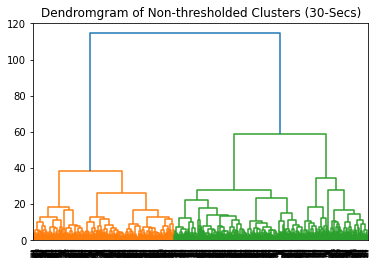

In [78]:
plt.title("Dendromgram of Non-thresholded Clusters (30-Secs)")
plot_dendrogram(_30_base_model)
plt.show()

In [79]:
uq,counts = np.unique(_30_base_model.labels_, return_counts= True)
class_freq = {uq[i]:counts[i] for i in range(len(uq))}
class_freq = dict(sorted(class_freq.items(), key=lambda item: item[1]))

In [80]:
for k,v in class_freq.items():
    print(f'Cluster ID: {k}\tNumber of Data in Cluster: {v}')

Cluster ID: 5	Number of Data in Cluster: 9
Cluster ID: 9	Number of Data in Cluster: 71
Cluster ID: 1	Number of Data in Cluster: 72
Cluster ID: 6	Number of Data in Cluster: 75
Cluster ID: 8	Number of Data in Cluster: 92
Cluster ID: 2	Number of Data in Cluster: 113
Cluster ID: 7	Number of Data in Cluster: 122
Cluster ID: 3	Number of Data in Cluster: 146
Cluster ID: 4	Number of Data in Cluster: 147
Cluster ID: 0	Number of Data in Cluster: 153


We have 10 clusters found:

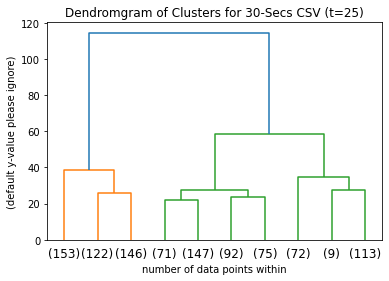

In [82]:
plt.title("Dendromgram of Clusters for 30-Secs CSV (t=25)")
plot_dendrogram(_30_base_model, truncate_mode='lastp', p=10)
plt.xlabel('number of data points within')
plt.ylabel('(default y-value please ignore)')
plt.show()

Text(0, 0.5, 'Amount')

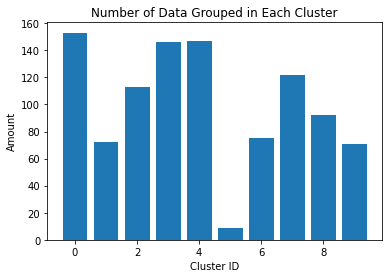

In [83]:
plt.title('Number of Data Grouped in Each Cluster')
plt.bar(class_freq.keys(), class_freq.values())
plt.xlabel('Cluster ID')
plt.ylabel('Amount')

In [86]:
_30_yhat = _30_base_model.labels_

In [88]:
_30_yhat

array([3, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 2, 0, 0, 0, 7,
       0, 0, 0, 0, 7, 0, 7, 7, 4, 7, 7, 3, 0, 7, 0, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 3, 3, 3, 3, 7, 7, 7, 0, 7, 7, 3, 3, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 7, 2, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 6, 8, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 4, 4, 0, 0, 2, 4, 4, 0, 2,
       0, 3, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 6, 6, 2, 8, 8, 2, 2, 6, 2, 2,
       8, 2, 2, 2, 2, 2, 6, 2, 2, 2, 6, 6, 6, 6, 9, 8, 2, 8, 8, 8, 8, 8,
       8, 8, 6, 8, 2, 2, 8, 2, 0, 0, 0, 7, 0, 3, 0, 0, 0, 0, 0, 0, 7, 0,
       0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 3, 2, 0, 6, 2, 7, 7, 7, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 7, 2, 0, 0, 0, 0, 0, 7, 8,